# Dataset Bienetre 

Chargement du dataset 

In [ ]:
import pandas as pd
import numpy as np 

df=pd.read_csv("/data/Downloads/bienetre.csv")
df.head(10)

voir les colonnes et leurs types  de notre dataset

In [ ]:
df.columns
df.dtypes

In [ ]:
doublons = df[df.duplicated()]
print(doublons)

# verification valeur manquante 

In [ ]:
print(df.isnull().sum())

# Résumé statistique du dataset : 


In [92]:
print("📊 Résumé statistique :")
print(df.describe())


📊 Résumé statistique :
             target           age        taille         poids        revenu  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.800000     47.978640    170.535341     74.042819   2796.214262   
std        0.748369     12.457695     10.114769     13.341103    781.533488   
min        0.000000      7.587327    129.436247     31.449135    275.978543   
25%        0.000000     39.405573    163.740683     64.729830   2204.563230   
50%        1.000000     47.619796    170.490729     73.192735   2757.064229   
75%        1.000000     56.637883    177.275880     82.251508   3381.817122   
max        2.000000     93.773829    214.790843    140.374368   5363.916672   

         experience     education           imc        stress    nb_enfants  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      19.032658      3.299494     25.621232      4.598669      1.836000   
std        6.242550      0.7

 ## Normalisation de la Donnée + PCA
 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustement et transformation des données
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_normalized)

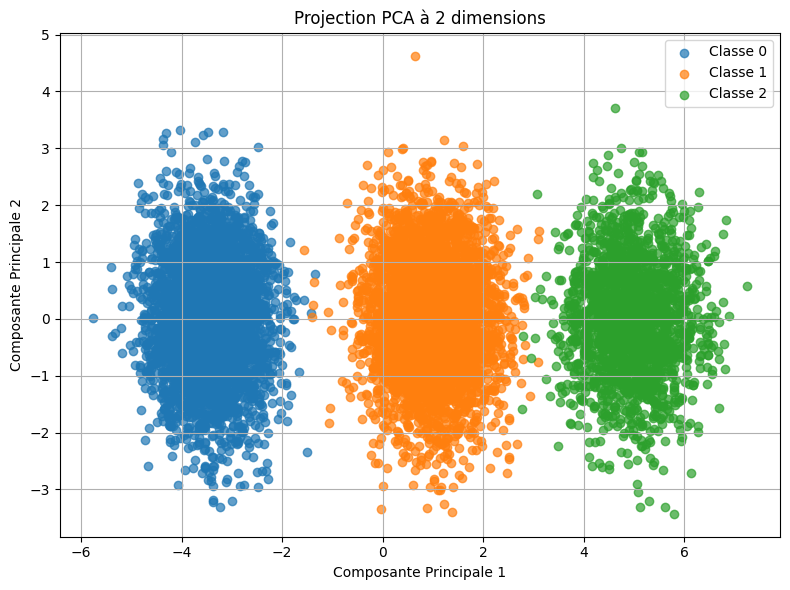

Variance expliquée par PC1 : 52.37%
Variance expliquée par PC2 : 4.91%


In [93]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


%matplotlib inline


X = df.drop(columns=['target'])
y = df['target']


X_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y.values

plt.figure(figsize=(8, 6))
for label in sorted(pca_df['target'].unique()):
    subset = pca_df[pca_df['target'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f"Classe {label}", alpha=0.7)

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection PCA à 2 dimensions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par PC1 : {explained_variance[0]:.2%}")
print(f"Variance expliquée par PC2 : {explained_variance[1]:.2%}")


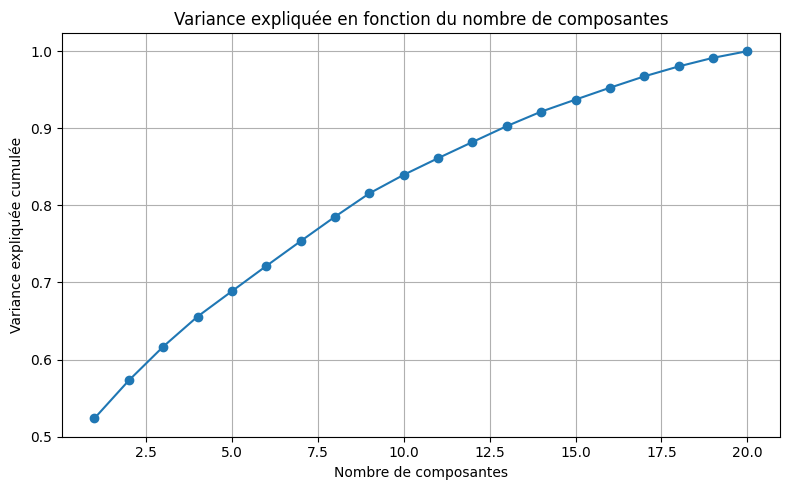

In [94]:
# PCA sans limite de composantes
pca_full = PCA()
pca_full.fit(X_scaled)

# Tracé du cumul de la variance expliquée
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée en fonction du nombre de composantes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:

pca_opt = PCA(n_components=0.95)
X_reduced = pca_opt.fit_transform(X_scaled)
print(f"Nombre de composantes retenues : {pca_opt.n_components_}")


Nombre de composantes retenues : 16


🔍 KNN Accuracy : 0.999


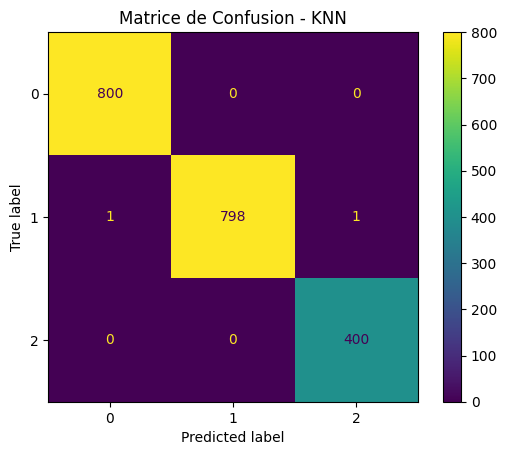

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer X (features) et y (target)
X = df.drop(columns=['target'])
y = df['target']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédiction
y_pred_knn = knn.predict(X_test)

# Évaluation
print("🔍 KNN Accuracy :", accuracy_score(y_test, y_pred_knn))

# Affichage matrice de confusion
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("Matrice de Confusion - KNN")
plt.show()


🔍 Régression Logistique Accuracy : 0.9995


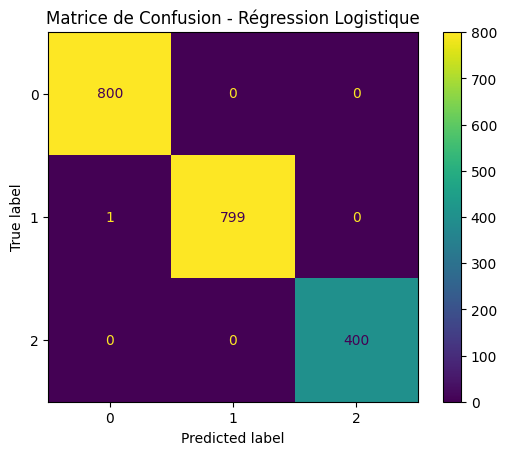

In [97]:
from sklearn.linear_model import LogisticRegression

# Entraînement
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prédiction
y_pred_log = logreg.predict(X_test)

# Évaluation
print("🔍 Régression Logistique Accuracy :", accuracy_score(y_test, y_pred_log))

# Matrice de confusion
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()


🔍 Arbre de Décision Accuracy : 0.9795


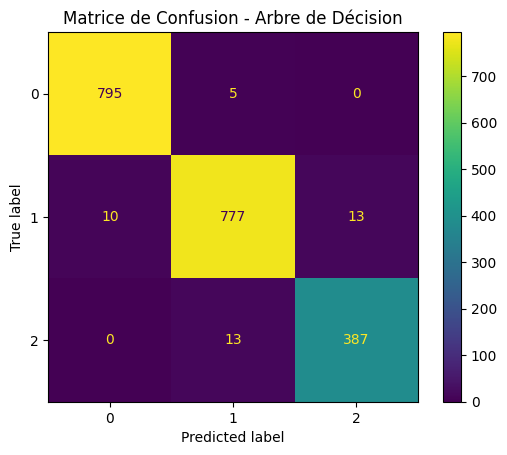

In [98]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Entraînement
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Prédiction
y_pred_tree = tree.predict(X_test)

# Évaluation
print("🔍 Arbre de Décision Accuracy :", accuracy_score(y_test, y_pred_tree))

# Matrice de confusion
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
plt.title("Matrice de Confusion - Arbre de Décision")
plt.show()



In [99]:
print("📊 Comparaison des Accuracy :")
print(f"KNN                : {accuracy_score(y_test, y_pred_knn):.2%}")
print(f"Régression Logistique : {accuracy_score(y_test, y_pred_log):.2%}")
print(f"Arbre de Décision      : {accuracy_score(y_test, y_pred_tree):.2%}")


📊 Comparaison des Accuracy :
KNN                : 99.90%
Régression Logistique : 99.95%
Arbre de Décision      : 97.95%


 # 🔵 5. Clustering Non Supervisé avec KMeans

🔍 Adjusted Rand Index (comparaison avec classes réelles) : 1.00


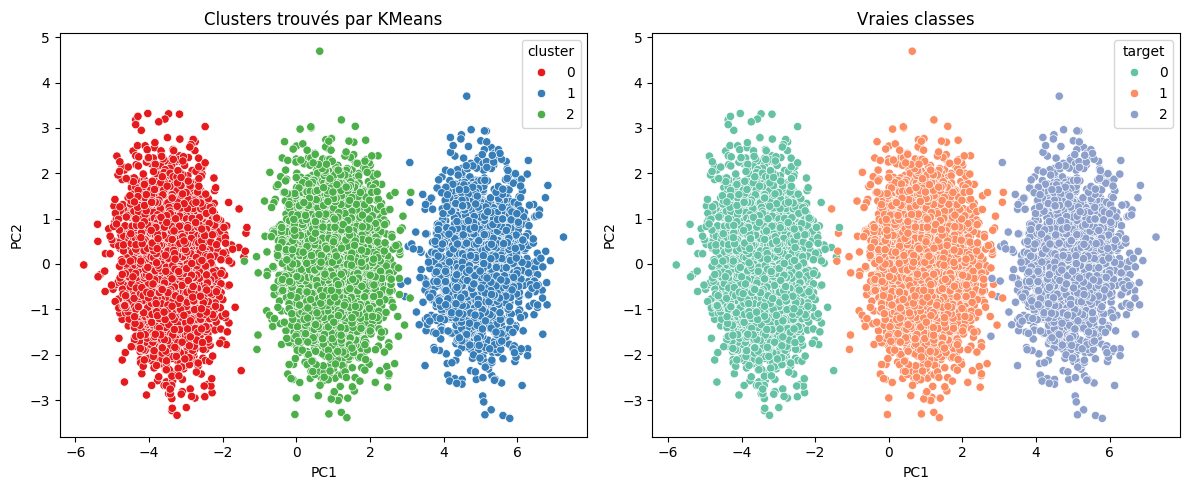

In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import seaborn as sns

# Ici on part avec les données normalisées
X_for_clustering = X_scaled

# Appliquer KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_for_clustering)

# Comparaison avec les vraies classes
ari = adjusted_rand_score(y, clusters)
print(f"🔍 Adjusted Rand Index (comparaison avec classes réelles) : {ari:.2f}")

# Visualisation (en 2D PCA si dispo)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_for_clustering)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster"] = clusters
pca_df["target"] = y.values

plt.figure(figsize=(12, 5))

# Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set1")
plt.title("Clusters trouvés par KMeans")

# Vraies classes
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="Set2")
plt.title("Vraies classes")

plt.tight_layout()
plt.show()


# 🟡 6. Optimisation des Hyperparamètres avec Grid Search

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Définition du modèle
knn = KNeighborsClassifier()

# Grille d'hyperparamètres
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search avec validation croisée (5 folds)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Résultats
print("🔍 Meilleurs paramètres trouvés :", grid_search.best_params_)
print("✅ Meilleure accuracy (validation croisée) :", grid_search.best_score_)

# Tester sur les données de test
best_knn = grid_search.best_estimator_
test_acc = best_knn.score(X_test, y_test)
print("📈 Accuracy sur l'ensemble de test :", test_acc)


🔍 Meilleurs paramètres trouvés : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
✅ Meilleure accuracy (validation croisée) : 0.9995
📈 Accuracy sur l'ensemble de test : 0.999


In [102]:
from sklearn.model_selection import cross_val_score

# Exemple avec le KNN optimisé précédemment
scores = cross_val_score(best_knn, X_scaled, y, cv=5, scoring='accuracy')

print("📊 Scores de validation croisée :", scores)
print(f"✅ Moyenne des scores : {scores.mean():.2%}")
print(f"📉 Écart-type (stabilité) : {scores.std():.2%}")


📊 Scores de validation croisée : [0.9995 1.     0.999  0.9995 0.9995]
✅ Moyenne des scores : 99.95%
📉 Écart-type (stabilité) : 0.03%
